In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
# save filepath to variable for easier access
path="/content/drive/My Drive/praktikum-ml/bike_buyers_clean.csv"

# read the data and store data in DataFrame titled dataframe
# index_col = kolom ke-0 dijadikan index
dataframe=pd.read_csv(path,index_col=0)

# print a summary of the data
dataframe.head()

Mounted at /content/drive


,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
ID,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
dataframe.shape

(1000, 12)

In [ ]:
dataframe.dtypes

Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


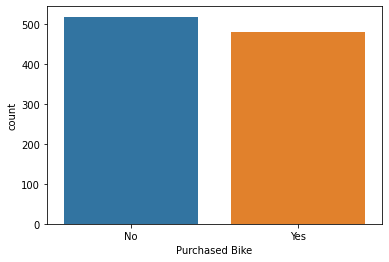

In [ ]:
# Plotting Purchased Bike
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

plt.figure(figsize = (6,4))
sns.countplot(dataframe['Purchased Bike'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91629d8f90>,
      dtype=object)

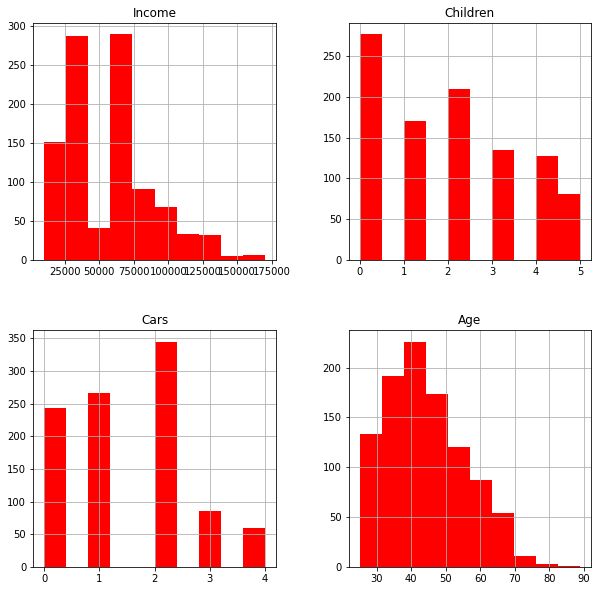

In [ ]:
x=dataframe.drop('Purchased Bike', axis=1)
y=dataframe['Purchased Bike']
x.hist(figsize=(10,10),  color = "red")

In [ ]:
dataframe.isnull().sum()

Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
import numpy as np
# axis=1 : column
# using drop because it's better to drop what column we don't need instead of adding one by one what column that we need
X = dataframe.drop(['Purchased Bike'],axis=1)
X.shape

(1000, 11)

In [ ]:
y= dataframe['Purchased Bike'].values[:,np.newaxis]
y.shape

(1000, 1)

Because dataset have no missing values then no need drop any columns or rows

# Drop Categoricals Variables

In [ ]:
# drop_df is any column numerical of X (features)
drop_df = X.select_dtypes(exclude=['object'])
drop_df

,Income,Children,Cars,Age
ID,,,,
12496,40000,1,0,42
24107,30000,3,1,43
14177,80000,5,2,60
24381,70000,0,1,41
25597,30000,0,0,36
...,...,...,...,...
23731,60000,2,2,54
28672,70000,4,0,35
11809,60000,2,0,38


# Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# X_copy is copying from variable dataframe
X_copy = X.copy()
X_copy.head(2)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
ID,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43


In [ ]:
X_copy.dtypes

Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
dtype: object

In [ ]:
ordinal_encoder = OrdinalEncoder()
s = (X_copy.dtypes == 'object')
object_cols_X = list(s[s].index)
X_copy[object_cols_X] = ordinal_encoder.fit_transform(X[object_cols_X])
X_copy.head(2)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
ID,,,,,,,,,,,
12496,0.0,0.0,40000,1,0.0,4.0,1.0,0,0.0,0.0,42
24107,0.0,1.0,30000,3,3.0,0.0,1.0,1,0.0,0.0,43


# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (X.dtypes == 'object')
object_cols_X = list(s[s].index)

In [ ]:
object_cols_X

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region']

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X]))

OH_cols.index = X.index

num_X = X.drop(object_cols_X, axis=1)

OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X

,Income,Children,Cars,Age,0,1,2,3,4,5,...,14,15,16,17,18,19,20,21,22,23
ID,,,,,,,,,,,,,,,,,,,,,
12496,40000,1,0,42,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24107,30000,3,1,43,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14177,80000,5,2,60,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24381,70000,0,1,41,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25597,30000,0,0,36,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,60000,2,2,54,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28672,70000,4,0,35,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11809,60000,2,0,38,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Label Encoder for y (target)

In [ ]:
# Because label is categorical so we need to change into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['Purchased Bike LE'] = le.fit_transform(dataframe['Purchased Bike'])

In [ ]:
dataframe.head(1)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Purchased Bike LE
ID,,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0


In [ ]:
y_LE= dataframe['Purchased Bike LE'].values[:,np.newaxis]
y.shape

(1000, 1)

# Accuracy for Drop Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train_drop, X_valid_drop, y_train_drop, y_valid_drop = train_test_split(drop_df, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
X_train_drop.shape

(800, 4)

In [ ]:
y_train_drop.shape

(800, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train_drop, y_train_drop)
preds = model.predict(X_valid_drop)
print("Drop Categorical MAE")
print(mean_absolute_error(y_valid_drop, preds))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Drop Categorical MAE
0.39656719932844936


In [ ]:
preds

array([0.50883333, 0.76      , 0.56333333, 0.68558333, 0.04      ,
       0.01      , 0.02      , 0.1895    , 0.02      , 0.40388095,
       0.16764286, 0.54      , 0.595     , 0.93258333, 0.50447186,
       0.31230952, 0.02      , 0.98666667, 0.9275    , 0.53594048,
       0.874     , 0.94616667, 0.        , 0.51      , 0.97357143,
       0.08019048, 0.1645    , 0.58      , 0.9175    , 0.46083333,
       0.87528571, 0.74111111, 0.09383333, 0.31440476, 0.44      ,
       0.32809524, 0.02      , 0.80040476, 0.        , 0.984     ,
       0.6525    , 0.696     , 0.1675    , 0.65383333, 0.        ,
       0.63083333, 0.49333333, 0.874     , 0.        , 0.72704762,
       0.27066667, 0.7175    , 0.7425    , 0.53166667, 0.115     ,
       0.32583333, 0.64333333, 0.9325    , 0.01      , 0.28      ,
       0.85161905, 0.89066667, 0.07002381, 0.138     , 0.50447186,
       0.54662554, 0.14333333, 0.35211905, 0.49      , 0.10416667,
       0.5315    , 0.7875    , 0.52239286, 0.91      , 0.36373

In [ ]:
# Accuracy total
import numpy
from sklearn.metrics import accuracy_score
accuracy_score(y_valid_drop, numpy.round(preds))

0.595

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_valid_drop, numpy.round(preds))

0.5670103092783505

In [ ]:
recall_score(y_valid_drop, numpy.round(preds))

0.5851063829787234

In [ ]:
# From recall & precision we've got F1 Score
matrix = classification_report(y_valid_drop, numpy.round(preds),labels=[1,0])
print('Classificationr report: \n', matrix)

Classificationr report: 
               precision    recall  f1-score   support

           1       0.57      0.59      0.58        94
           0       0.62      0.60      0.61       106

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.60      0.59      0.60       200



# Accuracy for Ordinal Encoder Method

In [ ]:
X_copy.head(1)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
ID,,,,,,,,,,,
12496,0.0,0.0,40000,1,0.0,4.0,1.0,0,0.0,0.0,42


In [ ]:
X_copy.shape

(1000, 11)

In [ ]:
y_LE.shape

(1000, 1)

In [ ]:
X_train_ord, X_valid_ord, y_train_ord, y_valid_ord = train_test_split(X_copy, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train_ord, y_train_ord)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [ ]:
preds = model.predict(X_valid_ord)

In [ ]:
print("Ordinal Encoder MAE")
print(mean_absolute_error(y_valid_ord, preds))

Ordinal Encoder MAE
0.3599575


In [ ]:
# Accuracy total
import numpy
from sklearn.metrics import accuracy_score
accuracy_score(y_valid_ord, numpy.round(preds))

0.705

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_valid_ord, numpy.round(preds))

0.6966292134831461

In [ ]:
recall_score(y_valid_ord, numpy.round(preds))

0.6595744680851063

In [ ]:
# From recall & precision we've got F1 Score
matrix = classification_report(y_valid_ord, numpy.round(preds),labels=[1,0])
print('Classificationr report: \n', matrix)

Classificationr report: 
               precision    recall  f1-score   support

           1       0.70      0.66      0.68        94
           0       0.71      0.75      0.73       106

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



# Accuracy for One Hot Encoding Method

In [ ]:
X_train_ohe, X_valid_ohe, y_train_ohe, y_valid_ohe = train_test_split(OH_X, y_LE, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
OH_X.shape

(1000, 28)

In [ ]:
X_valid_ohe.shape

(200, 28)

In [ ]:
y_LE.shape

(1000, 1)

In [ ]:
y_valid_ohe.shape

(200, 1)

In [ ]:
y_valid_ohe

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
model = RandomForestRegressor()
model.fit(X_train_ohe, y_train_ohe)
preds = model.predict(X_valid_ohe)
print("One Hot Encoding MAE")
print(mean_absolute_error(y_valid_ohe, preds))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


One Hot Encoding MAE
0.3573609523809524


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_train_ohe

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
preds

array([0.42      , 0.24      , 0.34      , 0.745     , 0.02      ,
       0.07      , 0.1       , 0.12      , 0.        , 0.275     ,
       0.17      , 0.49      , 0.58      , 0.68      , 0.19      ,
       0.25      , 0.12      , 0.9       , 0.3       , 0.46633333,
       0.8       , 0.85      , 0.06      , 0.78      , 0.92      ,
       0.28      , 0.48      , 0.65      , 0.88      , 0.36      ,
       0.9       , 0.7       , 0.1       , 0.73      , 0.48833333,
       0.69      , 0.02      , 0.96      , 0.61      , 0.51      ,
       0.37      , 0.6       , 0.17      , 0.55      , 0.03      ,
       0.63      , 0.8       , 0.6       , 0.07      , 0.71      ,
       0.56      , 0.59      , 0.83      , 0.36      , 0.27      ,
       0.21      , 0.27      , 0.81      , 0.21      , 0.46      ,
       0.91      , 0.52      , 0.61      , 0.21      , 0.28      ,
       0.59      , 0.22      , 0.13      , 0.69      , 0.51      ,
       0.46      , 0.84      , 0.76333333, 0.93      , 0.06   

In [ ]:
# Accuracy total
import numpy
from sklearn.metrics import accuracy_score
accuracy_score(y_valid_ohe, numpy.round(preds))

0.72

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_valid_ohe, numpy.round(preds))

0.7065217391304348

In [ ]:
recall_score(y_valid_ohe, numpy.round(preds))

0.6914893617021277

In [ ]:
# From recall & precision we've got F1 Score
matrix = classification_report(y_valid_ohe, numpy.round(preds),labels=[1,0])
print('Classification report: \n', matrix)

Classification report: 
               precision    recall  f1-score   support

           1       0.71      0.69      0.70        94
           0       0.73      0.75      0.74       106

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

